In [75]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#  #01 - Baixando Dados

In [76]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [77]:
fetch_housing_data()

In [78]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# #02 - Uma rápida olhada na estrutura dos dados

In [79]:
housing = load_housing_data()

In [80]:
housing.head().style.background_gradient()

# Cada linha representa um bairro , e existem 10 atributos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY


In [81]:
# Mapear os nomes das colunas para suas traduções
traducoes = {
    'longitude': 'longitude',
    'latitude': 'latitude',
    'housing_median_age': 'idade_mediana_das_residências',
    'total_rooms': 'total_de_cômodos',
    'total_bedrooms': 'total_de_quartos',
    'population': 'população',
    'households': 'domicílios',
    'median_income': 'renda_mediana',
    'median_house_value': 'valor_mediano_das_residências',
    'ocean_proximity': 'proximidade_do_oceano'
}

In [82]:
housing = housing.rename(columns=traducoes)

In [83]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   longitude                      20640 non-null  float64
 1   latitude                       20640 non-null  float64
 2   idade_mediana_das_residências  20640 non-null  float64
 3   total_de_cômodos               20640 non-null  float64
 4   total_de_quartos               20433 non-null  float64
 5   população                      20640 non-null  float64
 6   domicílios                     20640 non-null  float64
 7   renda_mediana                  20640 non-null  float64
 8   valor_mediano_das_residências  20640 non-null  float64
 9   proximidade_do_oceano          20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
# Olhando para as variveis de classificação do tipo OBJECT e visualizar sua distribuição

housing["proximidade_do_oceano"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: proximidade_do_oceano, dtype: int64

In [85]:
# Olhando para as variaveis numericas

#std MOSTRA O DESVIO PADRÃO que mede a dispersão dos valores

housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
idade_mediana_das_residências,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_de_cômodos,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_de_quartos,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
população,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
domicílios,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
renda_mediana,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
valor_mediano_das_residências,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


<function matplotlib.pyplot.show(close=None, block=None)>

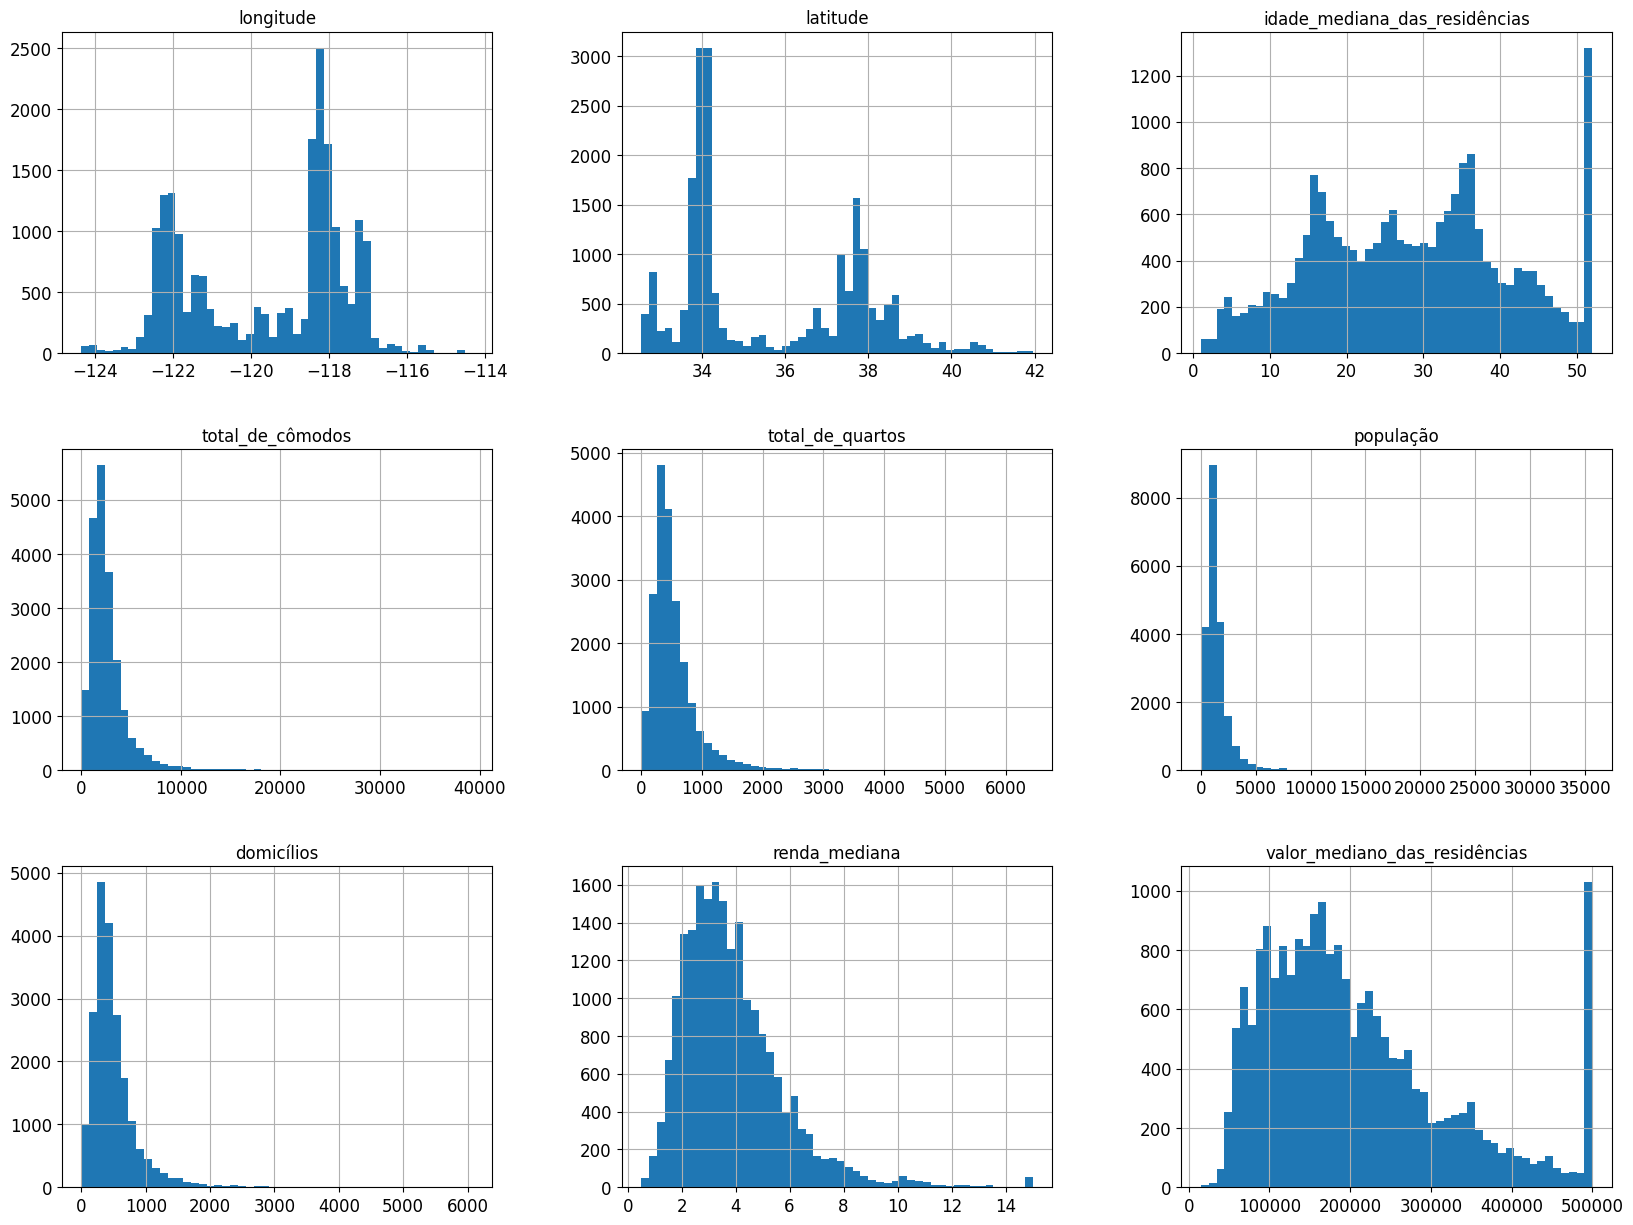

In [86]:
#%matplotlib inline
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(20,15))
plt.show

# Análise dos Histogramas

Ao observar esses histogramas, você percebe algumas coisas:

- **Primeiro**, o atributo de renda mediana não parece estar expresso em dólares americanos (USD). Após verificar com a equipe que coletou os dados, você é informado de que os dados foram escalados e limitados em 15 (na verdade, 15.0001) para rendas medianas mais altas e em 0.5 (na verdade, 0.4999) para rendas medianas mais baixas. Os números representam aproximadamente dezenas de milhares de dólares (por exemplo, 3 na verdade significa cerca de $30.000). Trabalhar com atributos pré-processados é comum em aprendizado de máquina, e não necessariamente é um problema, mas você deve tentar entender como os dados foram calculados.

- **A idade mediana das habitações e o valor mediano das casas** também foram limitados. Este último pode ser um problema sério, pois é o seu atributo alvo (seus rótulos). Seus algoritmos de aprendizado de máquina podem aprender que os preços nunca ultrapassam esse limite. Você precisa verificar com a equipe do cliente (a equipe que usará a saída do seu sistema) para ver se isso é um problema ou não. Se eles disserem que precisam de previsões precisas mesmo além de $500.000, então você tem duas opções:
  - Coletar rótulos adequados para os distritos cujos rótulos foram limitados.
  - Remover esses distritos do conjunto de treinamento (e também do conjunto de testes, já que seu sistema não deve ser avaliado negativamente se prever valores além de $500.000).

- **Esses atributos têm escalas muito diferentes**. Discutiremos isso mais tarde neste capítulo, quando explorarmos a escalonamento de características.

- **Por fim, muitos histogramas estão inclinados para a direita**: eles se estendem muito mais para a direita da mediana do que para a esquerda. Isso pode tornar um pouco mais difícil para alguns algoritmos de aprendizado de máquina detectar padrões. Mais tarde, você tentará transformar esses atributos para ter distribuições mais simétricas e em forma de sino.


# #03 - Conjunto Teste

In [87]:
#Para tornar a saída deste notebook idêntica em cada execução.

np.random.seed(42)

Usando uma função para ilustrar oq o Sklearn faz :

In [88]:
import numpy as np

# o propósito desta função é apenas para ilustração e que, na prática,  é recomendável usar a função train_test_split fornecida pela biblioteca 
#scikit-learn (sklearn). A função train_test_split faz exatamente o que esta função faz, mas com mais recursos e manipulação de casos especiais.

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Usando Sklearn :

In [89]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [90]:
len(train_set)

16512

In [91]:
len(test_set)

4128

Esse código é usado para dividir um conjunto de dados em conjuntos de treinamento e teste de acordo com algum identificador único, garantindo que os mesmos itens permaneçam no mesmo conjunto ao longo do tempo, mesmo se o conjunto de dados for atualizado

In [92]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Adcionando ID ao data frame

In [93]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [94]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [95]:
test_set.head()

,index,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana,valor_mediano_das_residências,proximidade_do_oceano,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [96]:
test_set.shape

(4318, 12)

In [97]:
train_set.shape

(16322, 12)

In [98]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [99]:
train_set.shape

(16512, 10)

In [100]:
test_set.shape

(4128, 10)

<Axes: >

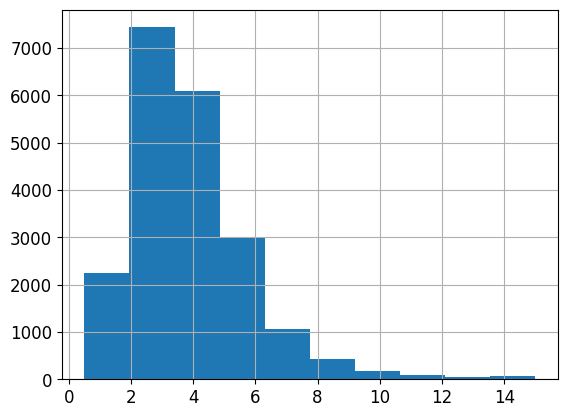

In [101]:
housing["renda_mediana"].hist()

"renda_cat" se refere a uma variável categórica que representa níveis de renda ou categorias de renda. É gerado essa variavel categorica para agrupar em
rotulos a renda para ter um numuro suficiente de instancias para cada estrato (amostragem estratificada) do conjunto de dados.

In [102]:
housing["renda_cat"] = pd.cut(housing["renda_mediana"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


# Divisão dos Intervalos de Renda:
# Os valores da coluna "median_income" são divididos em intervalos específicos,
# determinados pelos limites definidos nos bins. Esses intervalos representam diferentes faixas de renda.
# Por exemplo, se um valor de "median_income" estiver entre 0 e 1.5, ele será atribuído à categoria 1; 
# se estiver entre 1.5 e 3.0, será atribuído à categoria 2, e assim por diante.

In [103]:
housing["renda_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: renda_cat, dtype: int64

<Axes: >

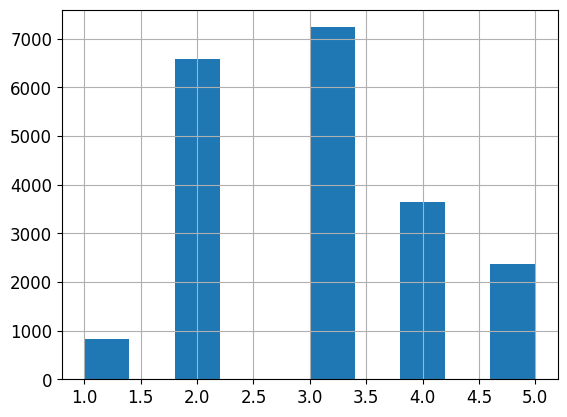

In [104]:
housing["renda_cat"].hist()

# Divisão estratificada do conjunto de dados em treinamento e teste :

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["renda_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Importação do Módulo StratifiedShuffleSplit

O código importa a classe `StratifiedShuffleSplit` do módulo `model_selection` do `scikit-learn`. Essa classe é usada para dividir os dados de forma estratificada e aleatória.

## Instanciação do Objeto split

Um objeto `StratifiedShuffleSplit` é instanciado com os seguintes parâmetros:
- `n_splits=1`: Define o número de divisões a serem feitas. Aqui, é especificado apenas uma divisão.
- `test_size=0.2`: Define o tamanho do conjunto de teste, que representa 20% dos dados.
- `random_state=42`: Define a semente para a geração de números aleatórios, garantindo reprodutibilidade nos resultados.

## Loop de Divisão

Um loop é iniciado para executar a divisão estratificada uma vez. Isso é indicado pelo parâmetro `n_splits=1`.
Durante cada iteração do loop, a função `split.split(housing, housing["income_cat"])` é chamada para gerar os índices de treinamento e teste para a divisão estratificada.
`housing` é o conjunto de dados a ser dividido e `housing["income_cat"]` é a coluna usada para estratificar os dados, garantindo que as proporções de cada categoria sejam mantidas tanto no conjunto de treinamento quanto no conjunto de teste.

## Atribuição dos Conjuntos de Treinamento e Teste

Dentro do loop, os índices de treinamento e teste gerados pela função `split.split()` são usados para selecionar as linhas correspondentes nos dados `housing`.
Os dados selecionados são atribuídos aos conjuntos `strat_train_set` e `strat_test_set`, respectivamente.

No final da execução desse código, você terá dois conjuntos de dados, `strat_train_set` e `strat_test_set`, que foram divididos estratificadamente a partir do conjunto de dados original `housing`. Isso é útil para garantir que as características importantes do conjunto de dados, como a distribuição da renda, sejam mantidas em ambas as amostras de treinamento e teste.


In [106]:
strat_test_set["renda_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: renda_cat, dtype: float64

In [107]:
len(housing)

20640

In [109]:
housing["renda_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: renda_cat, dtype: int64

%f das faixas de renda na base total

In [108]:
housing["renda_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: renda_cat, dtype: float64

Agora vamos comparar as proporções da categoria de renda no conjunto geral de dados, no conjunto de teste estratificado e conjunto de teste sem estratificação.

In [111]:

def income_cat_proportions(data):
    return data["renda_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [112]:
#Podemos ver que as categorias de renda que foi ultilizada para divisão estratificada possui menor desvio de proporção comparado com a divisão aleatoria 

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [113]:
strat_train_set.columns

Index(['longitude', 'latitude', 'idade_mediana_das_residências',
       'total_de_cômodos', 'total_de_quartos', 'população', 'domicílios',
       'renda_mediana', 'valor_mediano_das_residências',
       'proximidade_do_oceano', 'renda_cat'],
      dtype='object')

Dropando a var 'renda_cat' que foi ultilizada somente para a estratificação dos dados

In [114]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("renda_cat", axis=1, inplace=True)

# Explorar os dados 📊

In [115]:
# Criando uma cópia
housing = strat_train_set.copy()


Visualizando Dados Geográficos

Saving figure bad_visualization_plot


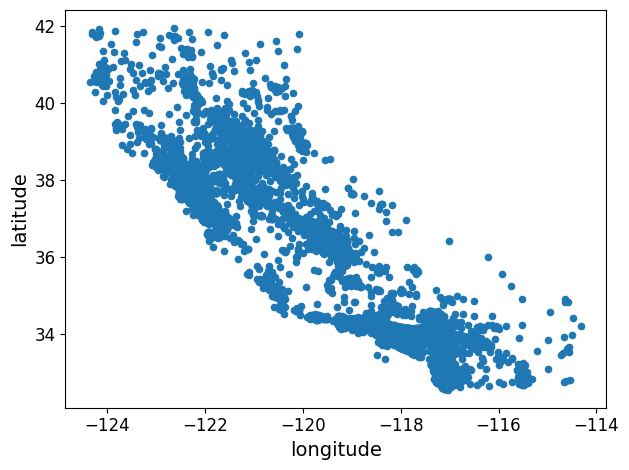

In [116]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


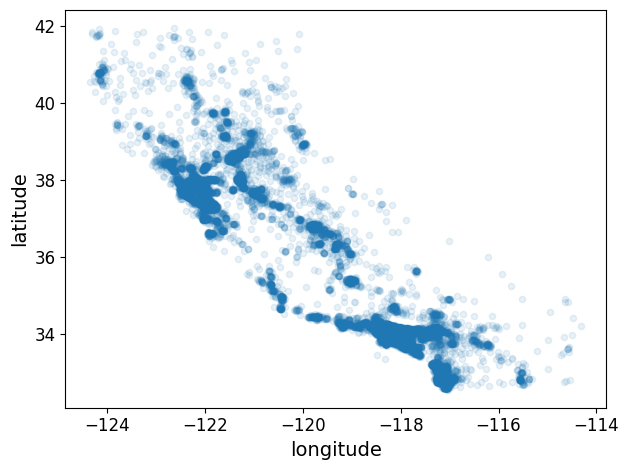

In [117]:
#Usando a função alpha=0.1 para visualizar as concentrações

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Visualizando os preços do setor imobiliário, cada círculo representa a população do bairro (s). A cor representa o preço (c). cmap : varia cores -> AZUL Valores mais baixos, Vermelho preços altos

In [118]:
housing.columns

Index(['longitude', 'latitude', 'idade_mediana_das_residências',
       'total_de_cômodos', 'total_de_quartos', 'população', 'domicílios',
       'renda_mediana', 'valor_mediano_das_residências',
       'proximidade_do_oceano'],
      dtype='object')

Saving figure housing_prices_scatterplot


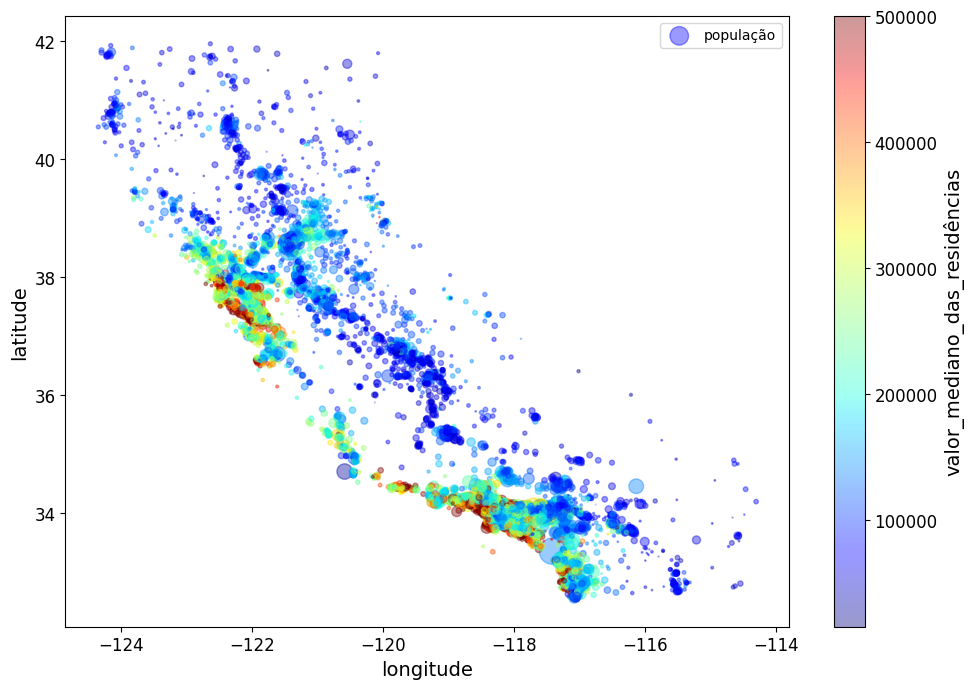

In [119]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["população"]/100, label="população", figsize=(10,7),
             c="valor_mediano_das_residências", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [52]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1bc01c55090>)

Avaliando a correlação das variáveis com o valor médio das casas

In [120]:
corr_matrix = housing.corr()

C:\Users\Jackson\AppData\Local\Temp\ipykernel_27848\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [121]:

corr_matrix["valor_mediano_das_residências"].sort_values(ascending=False)

valor_mediano_das_residências    1.000000
renda_mediana                    0.687151
total_de_cômodos                 0.135140
idade_mediana_das_residências    0.114146
domicílios                       0.064590
total_de_quartos                 0.047781
população                       -0.026882
longitude                       -0.047466
latitude                        -0.142673
Name: valor_mediano_das_residências, dtype: float64

Olhando para algumas variaveis mais promissoras para visualizar um gráfico de correlação:

Saving figure scatter_matrix_plot


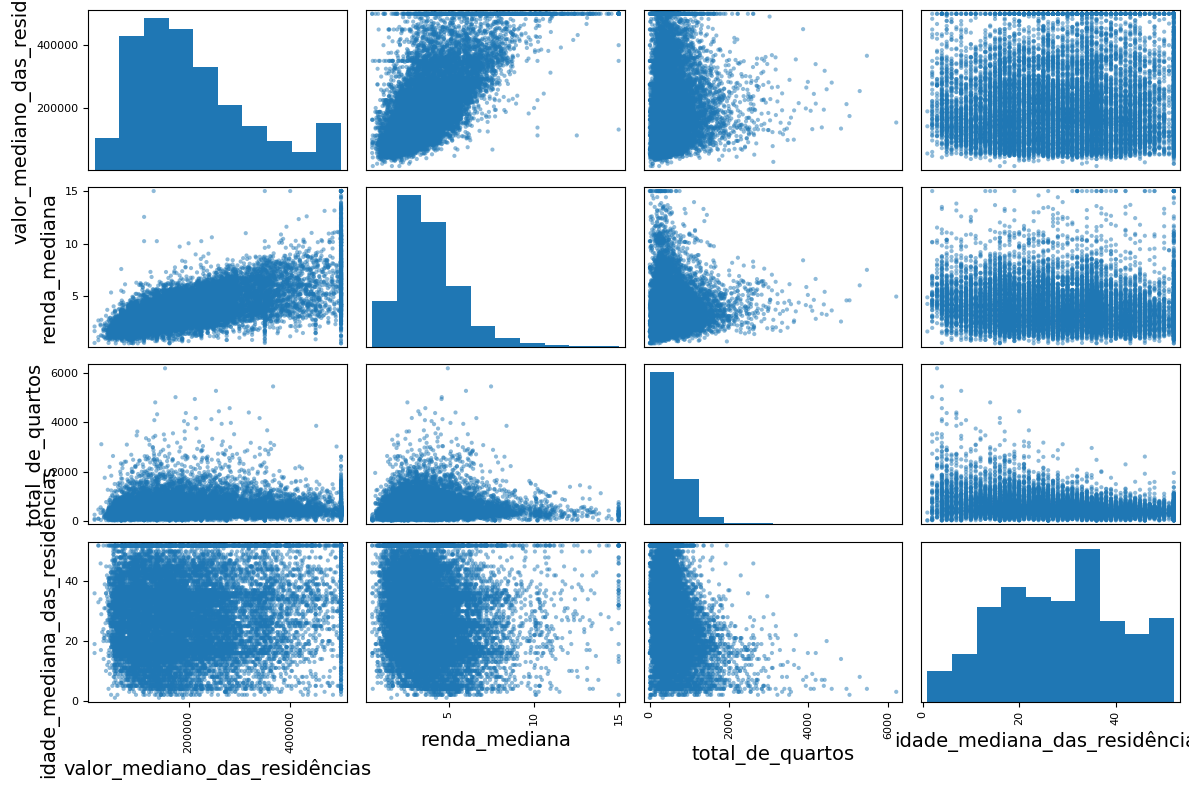

In [60]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["valor_mediano_das_residências", "renda_mediana", "total_de_quartos",
              "idade_mediana_das_residências"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


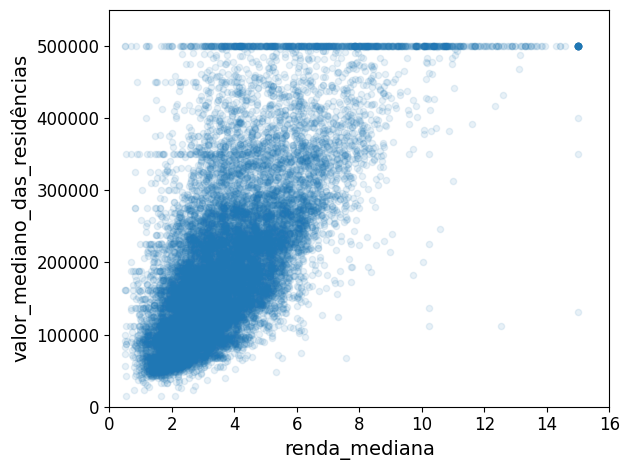

In [61]:
# Como a Renda tem maior correlçao com o valor das residências, vamos analisar ela.

housing.plot(kind="scatter", x="renda_mediana", y="valor_mediano_das_residências",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

As linhas horizontais podem fazer o moedelo ter uma performance ruim, portando é interesante o tratamento dessas instâncias

In [62]:
housing.columns

Index(['longitude', 'latitude', 'idade_mediana_das_residências',
       'total_de_cômodos', 'total_de_quartos', 'população', 'domicílios',
       'renda_mediana', 'valor_mediano_das_residências',
       'proximidade_do_oceano'],
      dtype='object')

# Experimentando com combinações de atributo

In [64]:
housing["comodos_por_domicilio"] = housing["total_de_cômodos"]/housing["domicílios"]
housing["quartos_por_comodos"] = housing["total_de_quartos"]/housing["total_de_cômodos"]
housing["populacao_por_domicilio"]=housing["população"]/housing["domicílios"]

In [65]:
corr_matrix = housing.corr()
corr_matrix['valor_mediano_das_residências'].sort_values(ascending=False)

C:\Users\Jackson\AppData\Local\Temp\ipykernel_27848\2943441468.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


valor_mediano_das_residências    1.000000
renda_mediana                    0.687151
comodos_por_domicilio            0.146255
total_de_cômodos                 0.135140
idade_mediana_das_residências    0.114146
domicílios                       0.064590
total_de_quartos                 0.047781
populacao_por_domicilio         -0.021991
população                       -0.026882
quartos_por_domicilio           -0.043349
longitude                       -0.047466
latitude                        -0.142673
quartos_por_comodos             -0.259952
Name: valor_mediano_das_residências, dtype: float64

# Prepare os dados para algoritmos do aprendizado de máquina

É hora de preparar os dados para seus algoritmos de Aprendizado de Máquina. Em vez de fazer isso manualmente, escreva funções, por vários bons motivos:

- Isso permitirá que você reproduza essas transformações facilmente em qualquer conjunto de dados (por exemplo, na próxima vez que você receber um novo conjunto de dados);
- Você gradualmente construirá uma biblioteca de funções de transformação que poderão ser reutilizadas em projetos futuros;
- Você pode usar essas funções em seu sistema ao vivo para transformar os novos dados antes de fornecê-lo aos seus algoritmos;
- Isso possibilitará que você tente varias combinações e variações




In [124]:
housing = strat_train_set.drop("valor_mediano_das_residências", axis=1) # drop labels for training set
housing_labels = strat_train_set["valor_mediano_das_residências"].copy()

Housing é a base sem o valor médio das rasidências (ALVO)

In [127]:
housing.head().style.background_gradient()

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana,proximidade_do_oceano
12655,-121.460000,38.520000,29.000000,3873.000000,797.000000,2237.000000,706.000000,2.173600,INLAND
15502,-117.230000,33.090000,7.000000,5320.000000,855.000000,2015.000000,768.000000,6.337300,NEAR OCEAN
2908,-119.040000,35.370000,44.000000,1618.000000,310.000000,667.000000,300.000000,2.875000,INLAND
14053,-117.130000,32.750000,24.000000,1877.000000,519.000000,898.000000,483.000000,2.226400,NEAR OCEAN
20496,-118.700000,34.280000,27.000000,3536.000000,646.000000,1837.000000,580.000000,4.496400,<1H OCEAN


Housing_labels é os valores das rasidências (ALVO)

In [129]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: valor_mediano_das_residências, Length: 16512, dtype: float64

In [132]:
housing['total_de_quartos'].isnull().sum()

158

# limpando os dados

In [133]:
housing.columns

Index(['longitude', 'latitude', 'idade_mediana_das_residências',
       'total_de_cômodos', 'total_de_quartos', 'população', 'domicílios',
       'renda_mediana', 'proximidade_do_oceano'],
      dtype='object')

Para tratar atributos com valores faltantes, usaremos funções para consertar isso. Há três opções para tratar os valores faltantes em total_de_quartos :

- Livras-se dos bairros correspondentes
- Livrar-se de todo o atributo
- Definir valores para algum valor(Zero, Média, intermediária)

Metodos :

- dropna()
- drop()
- fillna()


In [ ]:
housing.dropna(subset=["total_de_quartos"])    # option 1
housing.drop("total_de_quartos", axis=1)       # option 2
median = housing["total_de_quartos"].median()  # option 3
housing["total_de_quartos"].fillna(median, inplace=True)

Copiando o data_set mas trazendo somente os as linhas que possui algum valor nulo

In [134]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana,proximidade_do_oceano
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [136]:
sample_incomplete_rows.dropna(subset=["total_de_quartos"])    # option 1

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana,proximidade_do_oceano


In [137]:
sample_incomplete_rows.drop("total_de_quartos", axis=1)       # option 2

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,população,domicílios,renda_mediana,proximidade_do_oceano
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


Se você optar pela opção 3, grave o valor médio pois você irá precisar dele para substituir os valores faltantes na base de teste e também para quando o modelo entrar no produtivo para a entrada de novos dados

In [138]:
median = housing["total_de_quartos"].median()
sample_incomplete_rows["total_de_quartos"].fillna(median, inplace=True) # option 3

In [139]:
sample_incomplete_rows

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana,proximidade_do_oceano
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


Podemos usar uma classe SimpleImputer do Sckit-Learn para completar os dados faltantes

In [141]:
from sklearn.impute import SimpleImputer

In [142]:
imputer = SimpleImputer(strategy="median")

In [146]:
# Remova o atributo de texto porque a mediana só pode ser calculada em atributos numéricos

housing_num = housing.drop("proximidade_do_oceano", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [147]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

Lista com as médias de cada variável númerica:

In [148]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Checando se os resultados do SimpleImputer são as mesmas médias calculadas manualmente :

In [149]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Transformando o conjunto de treinamento

In [150]:
X = imputer.transform(housing_num)

In [153]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)


Este código está selecionando as linhas específicas do DataFrame housing_tr com base nos índices das linhas em sample_incomplete_rows :

In [154]:

housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


# Manipulando Texto e Atributos Categóricos

In [156]:
housing.columns

Index(['longitude', 'latitude', 'idade_mediana_das_residências',
       'total_de_cômodos', 'total_de_quartos', 'população', 'domicílios',
       'renda_mediana', 'proximidade_do_oceano'],
      dtype='object')

In [157]:
housing_cat = housing[["proximidade_do_oceano"]]
housing_cat.head(10)

,proximidade_do_oceano
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [158]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [161]:
# ARQ|ScikitLearn : Inspenção(categories_)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Tranformando em 0 e 1

In [162]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>


Por padrão, a classe OneHotEncoder retorna uma matriz esparsa, mas podemos convertê-la em uma matriz densa, se necessário, chamando o método toarray().

1. **Array**: Em Python, um array é uma estrutura de dados que contém uma coleção de elementos, todos do mesmo tipo. Pode ter uma ou mais dimensões. Por exemplo, um array unidimensional é semelhante a uma lista, enquanto um array bidimensional é semelhante a uma tabela ou matriz.

2. **Matriz Esparsa**: Uma matriz esparsa é uma estrutura de dados que é utilizada quando a maioria dos elementos em uma matriz são zeros. Em vez de armazenar todos os elementos da matriz, apenas os elementos diferentes de zero são armazenados, juntamente com suas posições (índices). Isso economiza espaço de armazenamento e pode melhorar a eficiência em operações matriciais, especialmente em matrizes grandes com muitos elementos zero. `J -  Usamos matriz esparsa para ocupar menos espaços com 0 e usando indices para localizar os 1 (REF LIVRO PG 66)`

3. **Matriz Densa**: Uma matriz densa é o oposto de uma matriz esparsa. Ela armazena todos os elementos da matriz, independentemente de serem zeros ou não. Ou seja, cada posição na matriz é ocupada por um valor. As matrizes densas são mais simples de manipular e têm uma representação mais direta dos dados, mas podem exigir mais memória, especialmente para matrizes grandes com muitos elementos zero.

Portanto, ao converter uma matriz esparsa em uma matriz densa usando o método `toarray()`, estamos convertendo uma representação compacta que armazena apenas os elementos diferentes de zero em uma representação completa que armazena todos os elementos da matriz. Isso pode ser útil em situações onde precisamos manipular os dados de forma mais direta ou onde a matriz é relativamente pequena e o custo de armazenamento não é uma preocupação.


In [165]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternativamente, você pode definir sparse=False ao criar o OneHotEncoder.

In [166]:
#Sparse = Esparsa
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [167]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Escalonamento e transformação de características

Escalonamento de variáveis númericas usando min_max e standscaler

In [168]:
housing_num

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [169]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [170]:
housing_num_min_max_scaled

array([[-0.42430279,  0.27098831,  0.09803922, ..., -0.87477228,
        -0.73711725, -0.76914801],
       [ 0.41832669, -0.88310308, -0.76470588, ..., -0.88721657,
        -0.71396565, -0.19485248],
       [ 0.05776892, -0.39851222,  0.68627451, ..., -0.96277923,
        -0.88872293, -0.67240452],
       ...,
       [-0.6752988 ,  0.25398512,  0.84313725, ..., -0.9744948 ,
        -0.93651979, -0.63037751],
       [-0.67131474,  0.22635494, -0.49019608, ..., -0.93245326,
        -0.81366692, -0.49014496],
       [-0.55976096,  0.57917109,  0.01960784, ..., -0.96513355,
        -0.92718447, -0.63697052]])

In [171]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [172]:
housing_num_std_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

Se você deseja escalonar uma matriz esparsa sem convertê-la primeiro em uma matriz densa, você pode usar um StandardScaler com seu hiperparâmetro with_mean configurado como False: ele apenas dividirá os dados pelo desvio padrão, sem subtrair a média (pois isso quebraria a esparsidade).

Custumizando transformadores do  - Quanto mais funções você criar mais variancias voce pode criar para testar no seu modelo para ver qual tem melhor performance

- Embora o Scikit-Learn forneça muitos transformadores úteis, você precisará escrever os seus próprios para tarefas como transformações personalizadas, operações de limpeza ou combinação de atributos específicos.

In [177]:
# Vamos criar um transformador de log e aplicá-lo à característica de população:

from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["população"]])

In [179]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


In [181]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
 sample_weight=housing_labels)


c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


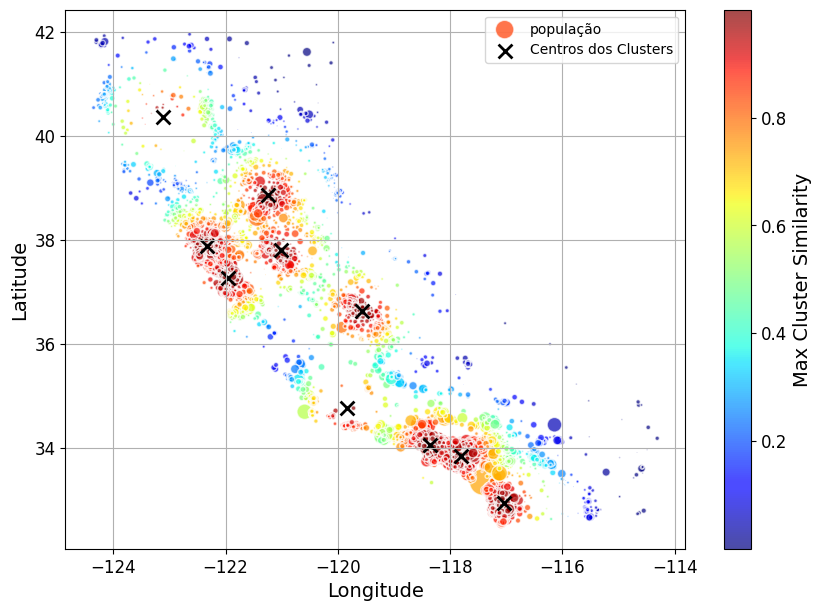

In [187]:
import matplotlib.pyplot as plt

# Scatter plot dos dados
plt.figure(figsize=(10, 7))
plt.scatter(housing["longitude"], housing["latitude"], alpha=0.7,  # Ajustando alpha para tornar as cores mais intensas
            s=housing["população"]/100, label="população",
            c=similarities.max(axis=1), cmap=plt.get_cmap("jet"), edgecolors='w')
plt.colorbar(label="Max Cluster Similarity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Plot dos centros dos clusters
cluster_centers = cluster_simil.kmeans_.cluster_centers_
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='x', s=100, c='black', label="Centros dos Clusters", linewidths=2, alpha=1.0)  # Ajustando alpha para tornar as cores dos centros dos clusters mais intensas

# Adicionando linhas de grade
plt.grid(True)

plt.legend()
plt.show()


# Pipelines de Transformação

Criando um pipeline para processar os atributos númericos

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [189]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [192]:
housing.columns

Index(['longitude', 'latitude', 'idade_mediana_das_residências',
       'total_de_cômodos', 'total_de_quartos', 'população', 'domicílios',
       'renda_mediana', 'proximidade_do_oceano'],
      dtype='object')

Pipeline tranformador para separar atributos numericos dos categóricos

In [193]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["proximidade_do_oceano"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [194]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [195]:
housing_prepared.shape

(16512, 16)

# Unindo dois pipelines

In [196]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [197]:
num_attribs = list(housing_num)
cat_attribs = ["proximidade_do_oceano"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [198]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [199]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [200]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Selecione o melhor modelo

In [209]:
# Testando regressão linear

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [211]:
# Vamos testar o modelo treinado para algumas instâncias:


some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)


print("Predictions: ", lin_reg.predict(some_data_prepared))


Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [212]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Comparando as 5 instancias com o previsto e 5 instancias do REAL nas Labels

In [213]:
#Analisando o erro quadratico médio RMSE

In [215]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

###  US$68.628 doláres isso significa que, em média, as previsões do nosso modelo estão erradas em cerca de US$68.628 em relação aos preços reais das casas.

- Isso significa que o modelo está subajustado aos dados de treinamento.


Quando isso acontece, pode significar que
as características não fornecem informações suficientes para fazer boas previsões ou que
o modelo não é suficientemente poderoso. Como vimos no capítulo anterior, as principais
formas de corrigir o subajuste são: selecionar um modelo mais poderoso, alimentar o algoritmo de treinamento com melhores características ou reduzir as restrições no modelo.
Este modelo não é regularizado, o que exclui a última opção. Você poderia tentar adicionar
mais características (por exemplo, o registro da população), mas primeiro vamos tentar
um modelo mais complexo para ver como ele se sai.

In [218]:
# Vamos tentar outro modelo

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [219]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

0 É um valor estranho, o modelo pode estar superajustado a base de treinamento

# Avaliando melhor os modelos usando a Validação Cruzada

Uma ótima alternativa é utilizar o recurso da validação cruzada do Scikit-Learn. O
código a seguir executa a validação cruzada K-fold: ele divide aleatoriamente o conjunto
de treinamento em 10 subconjuntos distintos chamados de partes (folds), então treina e
avalia o modelo da Árvore de Decisão 10 vezes escolhendo uma parte (fold) diferente a
cada uma delas para avaliação e treinando nas outras 9 partes. O resultado é um array
contendo as 10 pontuações de avaliação:

### Avaliando modelo de árvore de decisão

In [220]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

`Os recursos da validação cruzada do Scikit-Learn esperam uma
função de utilidade (mais alta é melhor) ao invés de uma função de
custo (mais baixa é melhor), de modo que a função de pontuação é
exatamente o oposto do MSE (ou seja, um valor negativo), e é por
isso que o código anterior calcula -scores antes de calcular a raiz
quadrada.`

In [221]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


Agora a Árvore de Decisão não tem uma aparência tão boa quanto antes. Na verdade,
parece ser pior do que o modelo de Regressão Linear! Observe que a validação cruzada
permite que você obtenha não apenas uma estimativa do desempenho do seu modelo,
mas também uma medida da precisão dessa estimativa (ou seja, seu desvio padrão). A
Árvore de Decisão possui uma pontuação de aproximadamente 71.379, geralmente ±
2.458. Você não teria essa informação se utilizasse apenas um conjunto de validação.
Mas a validação cruzada treina o modelo várias vezes, então nem sempre é possível.

In [222]:
# Calcularemos as mesmas pontuações para o modelo de Regressão Linear apenas para ter certeza:

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818065


### Testando Radom Forest Regressor

Construir um modelo em cima de muitos outros modelos é chamado Ensemble
Learning

In [223]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [225]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [226]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [227]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [228]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

# Ajuste seu modelo

Suponha que você possui uma lista de modelos promissores. Agora precisamos ajusta-los

### Grid Search

In [229]:
# Procurando os melhores hiperparametros do modelo Radom Forest usando grid search

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

`Uma abordagem simples seria testar potências de 10 consecutivas
quando você não tem ideia do valor que um hiperparâmetro deve ter
(ou um número menor se você quiser uma busca mais refnada, como
mostrado neste exemplo com o hiperparâmetro n_estimators)`

As melhores combinações de hiperparametros foram encontrados :

In [230]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [231]:
# Podemos obter o melhor estimado: 
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [232]:
# Podemos ver as pontuações de cada combinação :

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

Lembre-se quanto menor o RMSE melhor o modelo. Indica que o modelo erra menos

In [234]:
pd.DataFrame(grid_search.cv_results_).style.background_gradient()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.125253,0.010531,0.003642,0.000846,2,3,nan,"{'max_features': 2, 'n_estimators': 3}",-4119911733.796380,-3723465388.391227,-4238544299.939330,-4111135172.006393,-4219901771.229424,-4082591673.072551,186737511.762006,18,-1155629841.867304,-1089725741.944121,-1153842629.223921,-1118149143.817907,-1093445777.284523,-1122158626.827555,28342878.995746
1,0.419089,0.039040,0.010658,0.001460,2,10,nan,"{'max_features': 2, 'n_estimators': 10}",-2973520654.769745,-2810319342.743539,-3082769676.671339,-3113894619.986127,-3098508839.230839,-3015802626.680318,113980777.024679,11,-598294682.307704,-590478144.142376,-612384967.919096,-572768107.044672,-590521020.430868,-592889384.368943,12849778.613668
2,1.158642,0.021655,0.029155,0.003444,2,30,nan,"{'max_features': 2, 'n_estimators': 30}",-2801228550.287587,-2671473763.663811,-2751785416.491521,-2890902419.706264,-2869184572.645633,-2796914944.558963,79808916.783393,9,-441256687.725591,-432639765.359617,-455372213.985946,-432074566.260803,-431160638.611808,-438500774.388753,9184396.587357
3,0.175785,0.016301,0.003057,0.000311,4,3,nan,"{'max_features': 4, 'n_estimators': 3}",-3528743321.171494,-3490303011.836915,-3513593928.396224,-3652392088.922370,-3860216871.173969,-3609049844.300195,137568314.168378,16,-978236771.036179,-980645505.020811,-1003780163.811574,-1016515395.745849,-1011270173.029262,-998089601.728735,15773720.158864
4,0.600656,0.008761,0.010836,0.001167,4,10,nan,"{'max_features': 4, 'n_estimators': 10}",-2742619737.781880,-2609310959.902295,-2650458350.121632,-2855105686.921099,-2921137135.803649,-2755726374.106111,118260375.618164,7,-506321498.501246,-525798327.946969,-508198419.856994,-517440484.169270,-528206623.912953,-517193070.877486,8882621.752007
5,1.818914,0.071548,0.031506,0.006887,4,30,nan,"{'max_features': 4, 'n_estimators': 30}",-2522175970.640866,-2440240714.931990,-2411650112.261737,-2580082124.157778,-2639648002.812431,-2518759384.960960,84880842.558993,3,-377656805.601145,-390210613.946391,-388504211.863242,-383086617.943107,-389477881.152206,-385787226.101218,4774229.326224
6,0.256212,0.012937,0.009302,0.006752,6,3,nan,"{'max_features': 6, 'n_estimators': 3}",-3362127198.870825,-3311862603.035120,-3191159783.026146,-3613861693.205128,-3378556149.055421,-3371513485.438528,137808592.648930,13,-890939674.354152,-958373262.721040,-900020134.163117,-896473065.082614,-915192699.513946,-912199767.166974,24448368.046492
7,1.085958,0.158669,0.013610,0.004442,6,10,nan,"{'max_features': 6, 'n_estimators': 10}",-2622099271.094223,-2669654557.715543,-2548279380.999022,-2761691893.264927,-2669476884.545303,-2654240397.523804,69679781.628970,5,-493990613.728926,-514599647.510960,-502351197.409307,-495946657.118307,-514708697.198468,-504319362.593194,8880106.483507
8,2.950391,0.689482,0.032848,0.012879,6,30,nan,"{'max_features': 6, 'n_estimators': 30}",-2446141798.723434,-2446594140.427507,-2432703717.456278,-2534390086.288319,-2625077024.110212,-2496981353.401150,73570456.277461,2,-376096824.118156,-387663556.351522,-387530679.403406,-376093834.391737,-386105645.267083,-382698107.906381,5418747.322190
9,0.281690,0.010912,0.003401,0.000669,8,3,nan,"{'max_features': 8, 'n_estimators': 3}",-3590333098.970633,-3232664162.638208,-3433333327.889899,-3562378938.047615,-3524881483.520627,-3468718202.213397,129375754.798285,14,-950501165.256164,-916611916.567971,-903390960.013601,-907064210.090285,-945938645.815737,-924701379.548751,19734708.306086


# Método Ensemble : Analise os melhores modelos e seus erros

Olhando a importância dos atributos do modelo Random Forest Regressor

In [235]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [236]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'renda_mediana'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'idade_mediana_das_residências'),
 (0.015849114744428634, 'população'),
 (0.015554529490469328, 'total_de_quartos'),
 (0.01524505568840977, 'total_de_cômodos'),
 (0.014934655161887772, 'domicílios'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

Podemos descartar as características menos úteis (Ex: aparentemente apenas uma caracteristica do atributo proximidade_oceano é realmente importante(ISLAND), então podemos descartar as demais.)

# Finalmente vamos aplicar no conjunto de teste

In [238]:
strat_test_set.columns

Index(['longitude', 'latitude', 'idade_mediana_das_residências',
       'total_de_cômodos', 'total_de_quartos', 'população', 'domicílios',
       'renda_mediana', 'valor_mediano_das_residências',
       'proximidade_do_oceano'],
      dtype='object')

In [239]:
final_model = grid_search.best_estimator_ # Esse é o meu modelo com os melhores parametros do grid_search

X_test = strat_test_set.drop("valor_mediano_das_residências", axis=1)
y_test = strat_test_set["valor_mediano_das_residências"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [240]:
final_rmse

47873.26095812988

A full pipeline with both preparation and prediction

In [244]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

# Colocando o modelo em PRODUÇÃO

Perfeito, você recebeu aprovação para lançar! Agora você precisa preparar sua solução para produção (por exemplo, refinar o código, escrever documentação e testes, entre outros). Em seguida, você pode implantar seu modelo em seu ambiente de produção. A maneira mais básica de fazer isso é salvar o melhor modelo que você treinou, transferir o arquivo para o seu ambiente de produção e carregá-lo. Para salvar o modelo, você pode usar a biblioteca joblib assim:

In [243]:
# Salvando o melhor 

import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")


['my_california_housing_model.pkl']

É sempre uma boa ideia salvar todos os modelos com os quais você experimenta para que você possa retornar facilmente a qualquer modelo que desejar. Você também pode salvar as pontuações de validação cruzada e talvez as previsões reais no conjunto de validação. Isso permitirá que você compare facilmente as pontuações entre tipos de modelo e compare os tipos de erros que eles cometem.

Uma vez que seu modelo é transferido para produção, você pode carregá-lo e usá-lo. Para isso, você deve primeiro importar quaisquer classes e funções personalizadas de que o modelo depende (o que significa transferir o código para produção), em seguida, carregar o modelo usando joblib e usá-lo para fazer previsões.

Por exemplo, talvez o modelo seja utilizado dentro de um site: o usuário inserirá alguns dados sobre um novo distrito e clicará no botão de Estimar Preço. Isso enviará uma consulta contendo os dados para o servidor web, que encaminhará para a sua aplicação web, e finalmente seu código simplesmente chamará o método predict() do modelo (você deseja carregar o modelo ao iniciar o servidor, em vez de toda vez que o modelo for usado). Alternativamente, você pode encapsular o modelo dentro de um serviço web dedicado que sua aplicação web pode consultar por meio de uma API REST (consulte a Figura 2-20). Isso facilita a atualização do seu modelo para novas versões sem interromper a aplicação principal. Também simplifica a escalabilidade, já que você pode iniciar quantos serviços web forem necessários e balancear as requisições vindas da sua aplicação web entre esses serviços web. Além disso, permite que sua aplicação web utilize qualquer linguagem de programação, não apenas Python.


Outra estratégia popular é implantar seu modelo na nuvem, por exemplo, no Vertex AI do Google (anteriormente conhecido como Google Cloud AI Platform e Google Cloud ML Engine): basta salvar seu modelo usando o joblib e enviá-lo para o Google Cloud Storage (GCS), depois vá para o Vertex AI e crie uma nova versão do modelo, apontando para o arquivo GCS. Isso é tudo! Isso lhe dá um serviço web simples que cuida do balanceamento de carga e escalabilidade para você. Ele recebe solicitações JSON contendo os dados de entrada (por exemplo, de um distrito) e retorna respostas JSON contendo as previsões. Você pode então usar este serviço web em seu site (ou qualquer outro ambiente de produção que você esteja usando). Como você verá no Capítulo 19, implantar modelos do TensorFlow no Vertex AI não é muito diferente de implantar modelos do Scikit-Learn.